# Paris Airbnb Listings

___

![](https://www.lametayel.co.il/limages/33dcfe870bcca7f16063e765bab1ee24.jpg?size=720x600) 


In [1]:
#Import to pandas, numpy, matplotlib, seaborn and sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

### Our data is about apartments in Paris for a short time rent.

In [2]:
#Reading the Paris-Airbnb-Listings data
data ='https://raw.githubusercontent.com/tamarmordehay/Paris-Airbnb-Listings/main/paris-airbnb-listings.csv'
airbnb_data_n = pd.read_csv(data, delimiter=';', skiprows=0, low_memory=False)

In [3]:
#Removes the NAN values in the relevant columns
airbnb_data = airbnb_data_n.dropna(subset =['Host Name', 'Last Review','Reviews per Month'])
#Reorganing the indexes
airbnb_data.reset_index(inplace = True)
#Takes the relevant columns and makes a copy of it
airbnb_data = airbnb_data[["Id","Name","Host Name","Host Id","Neighbourhood","Latitude","Longitude","Room Type","Price","Minimum Nights","Number of Reviews","Last Review","Reviews per Month","Calculated Host Listings Count","Availability 365"]].copy()
airbnb_data.head()

,Id,Name,Host Name,Host Id,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability 365
0,6054594,Chambre en appartement,Piernicola,9120790,Panthéon,48.843145,2.352342,Private room,62,1,1,2015-04-24,0.23,1,111
1,4374451,CENTRE PARIS-MAGNIFIQUE APPART 42m2,Carmen,9574133,Panthéon,48.840035,2.351791,Entire home/apt,95,2,1,2015-07-31,0.86,1,254
2,6458389,5* 3bed lux family in Latin Quarter,Rabii,5049207,Panthéon,48.841434,2.350396,Entire home/apt,150,2,8,2015-08-30,4.14,2,264
3,7252800,Appartement lumineux et cosy,Marie,36877549,Panthéon,48.842588,2.342887,Entire home/apt,75,3,1,2015-08-28,1.00,1,327
4,2245440,Chambre indépendante - Notre-Dame,Alexandra,11468702,Panthéon,48.849818,2.353700,Private room,50,5,24,2015-08-23,1.41,2,310


### After checking the data we saw that no strong links could be found between the different columns and we started focusing on the information in the data itself

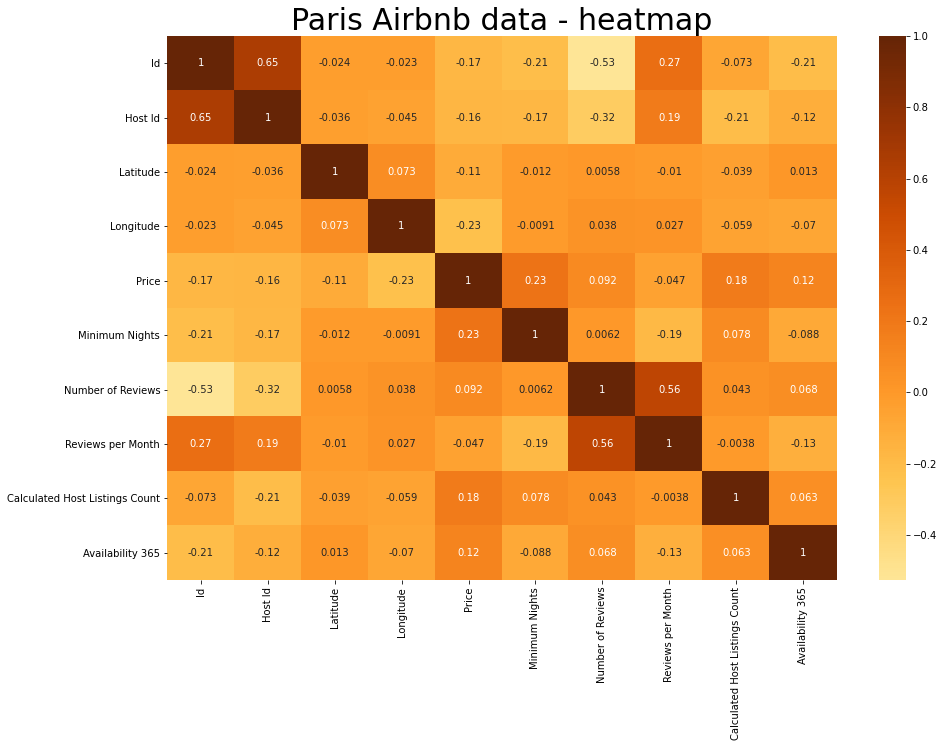

In [4]:
#After we checked the different types of correlations,
#we chose spearman in which the correlations are higher than the other methods.
corrs = airbnb_data.corr(method = 'spearman')
plt.figure(figsize=(15,10))
plt.title("Paris Airbnb data - heatmap",size=(30))
sns.heatmap(corrs, cmap='YlOrBr', center=0, annot = True);
plt.show()

### Pie - properties for rent

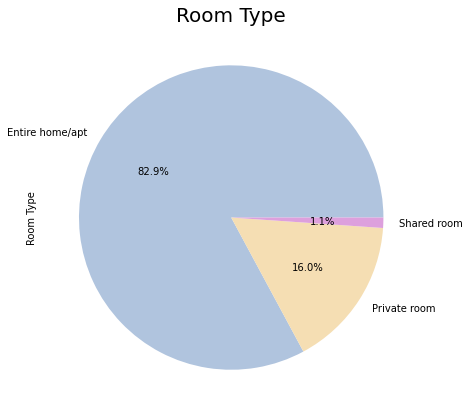

In [5]:
#Checking how much is in percentage of each asset
plt.figure(1, figsize=(7,7))
plt.title("Room Type",size=(20))
airbnb_data['Room Type'].value_counts().plot.pie(autopct="%1.1f%%",  colors = ['lightsteelblue', 'wheat',"plum"])
plt.show()

#### You can see by the pie that the almost absolute majority of the properties are renting the entire space, after that renting a single room and least renting the room with a partner.
### It can be concluded that more people prefer to rent an entire space and that is why it has the most, even though it also has rooms

In [6]:
#created a loop that divides the prices in 8 ranges
new_price= []
for i in airbnb_data["Price"]:
    if(i<=30):
        new_price.append(30)
        continue
    if(i>30 and i<=50):
        new_price.append(50)
        continue
    if (i>50 and i<=100):
        new_price.append(100)
        continue
    if( i>100 and i<=150):
        new_price.append(150)
        continue
    if (i>150 and i<=200):
        new_price.append(200)
        continue
    if (i>200 and i<=500):
        new_price.append(500)
        continue
    if (i>500 and i<=1000):
        new_price.append(1000)
        continue
    if (i>1000):
        new_price.append(3000)
        continue
        
airbnb_data['New price'] = pd.Series(new_price)

#### we made a new price column that shows us the price in 8 ranges : <30, <50, <100, <150, <200, <500, <1000, 3000>

In [7]:
#created a loop that divides the Availability in 8 ranges
new_Availability= []
count=0
for i in airbnb_data["Availability 365"]:
    count+=1
    if(i<=20):
        new_Availability.append(20)
        continue
    if(i>20 and i<=50):
        new_Availability.append(50)
        continue
    if (i>50 and i <=100):
        new_Availability.append(100)
        continue
    if( i>100 and i<=150):
        new_Availability.append(150)
        continue
    if (i<150 and i <=200):
        new_Availability.append(200)
        continue
    if (i>200 and i <=250):
        new_Availability.append(250)
        continue
    if (i>250 and i <=300):
        new_Availability.append(300)
        continue
    if (i>300 and i <= 365):
        new_Availability.append(365)
        continue

airbnb_data['New Availability'] = pd.Series(new_Availability) 


#### we made a new Availability column that shows us the Availability in 8 ranges : <20, <50, <100, <150, <200, <250, <300, 365>

### Price bar graph

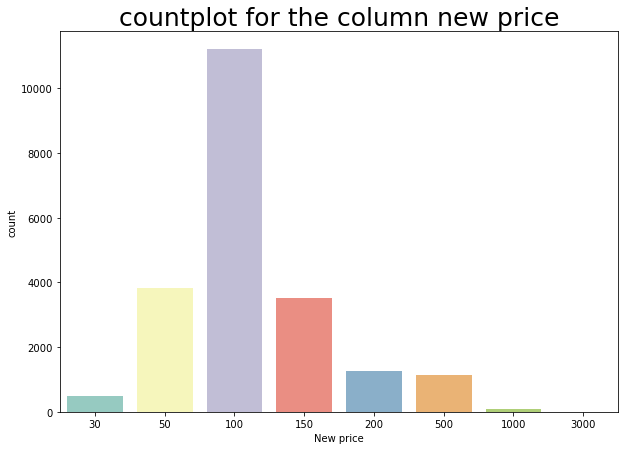

In [8]:
#We used the new column we created and checked which price range is highest
plt.figure(1, figsize=(10,7))
plt.title("countplot for the column new price",size=(25))
sns.countplot(x="New price", data=airbnb_data, palette="Set3")
plt.show()

#### You can see that most prices range from 30 to 150 with the most popular price being from 50 to 100 euros per night

In [9]:
#We created a new column 'Month' from the column 'Last Review'
airbnb_data['Last Review'] = pd.to_datetime(airbnb_data['Last Review'])
airbnb_data['Month'] = pd.DatetimeIndex(airbnb_data['Last Review']).month

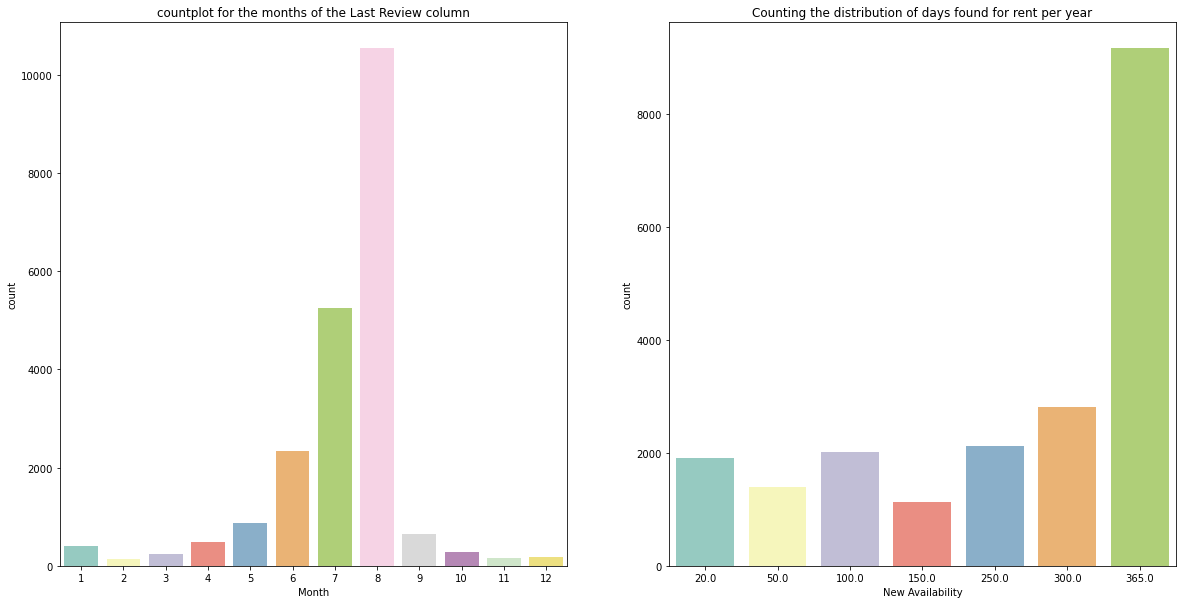

In [10]:
#We checked by the countplot graph, which months have more last reviews.
#We checked by the countplot graph, which distribution of days found for rent per year.
fig, axes = plt.subplots(figsize=(20,10), ncols=2)
sns.countplot(ax=axes[0], x="Month", data=airbnb_data, palette="Set3")
sns.countplot(ax=axes[1], x="New Availability", data=airbnb_data, palette="Set3")
axes[0].set_title("countplot for the months of the Last Review column")
axes[1].set_title('Counting the distribution of days found for rent per year')
plt.show()

#### we took the data from the last review column and looked at it per month.
#### you can see that the number of reviews in summer months (6, 7, 8) is much higher then others,
#### and in August its the highies.
#### this informition tell us that in the summer there is Lots of tourism in Paris

#### It can be seen that there is a discrepancy between the number of months actually leased and the number of days in the year in which the property is rented out.

### It can be concluded that it is not profitable to put a property for rent all year that most of the rent is in the summer

### let's see whice room can you get based on the amount of money you are willing to invest

In [11]:
#Adding columns to the data, a neighborhood column, a room type column
airbnb_data2 = airbnb_data.copy()
new_neigh = airbnb_data2["Neighbourhood"].astype("category").cat.codes
airbnb_data['New Neighbourhood'] = pd.Series(new_neigh)
new_room = airbnb_data2["Room Type"].astype("category").cat.codes
airbnb_data['New Room Type'] = pd.Series(new_room)

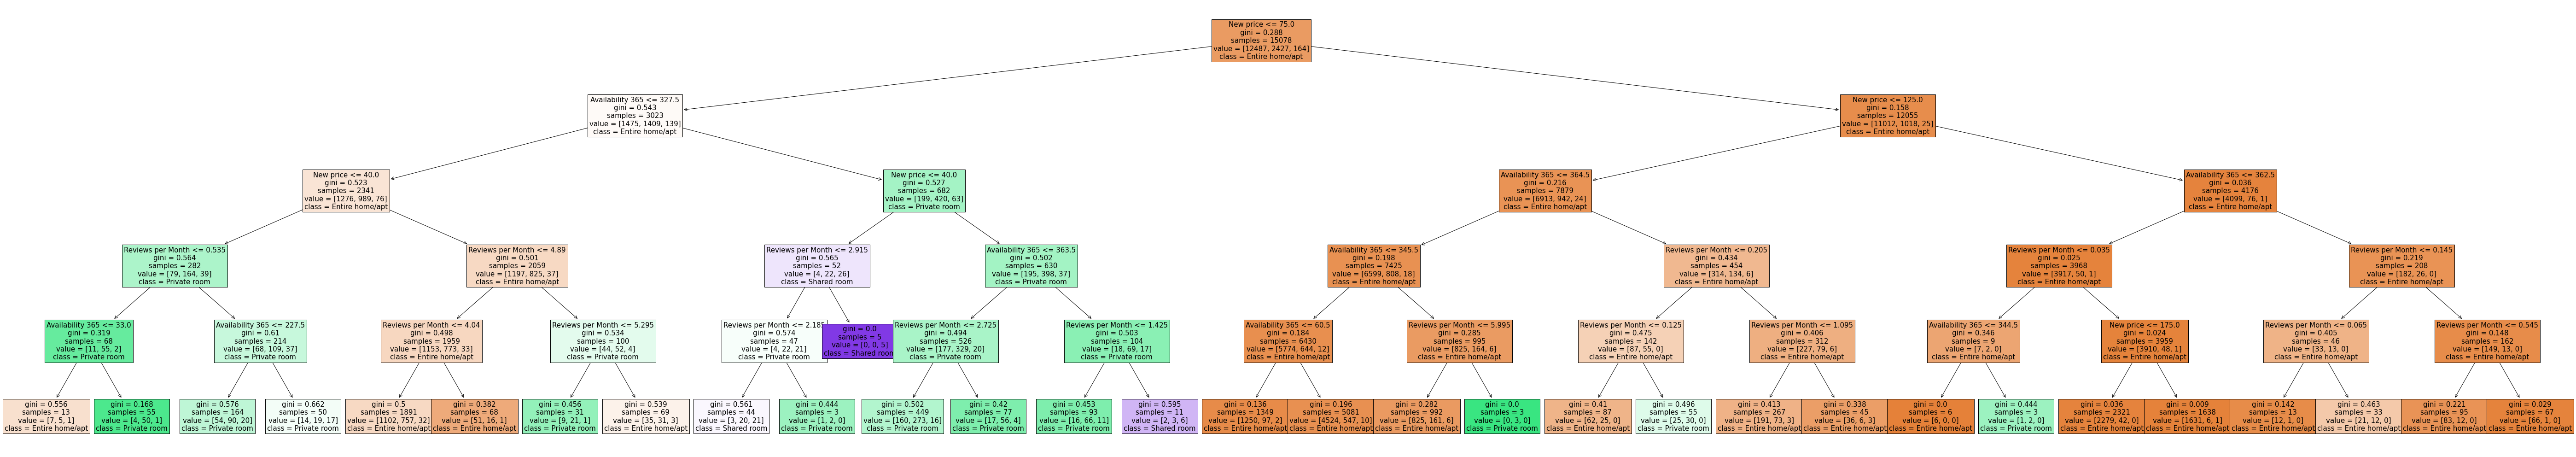

The model of Room Type score is: 0.8505769996020692


In [12]:
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat,                   
                   class_names= model.classes_,
                   filled=True,
                  fontsize=15)  
    plt.show()
    
    
X = airbnb_data[["New price","Availability 365","Reviews per Month"]] 
Y = airbnb_data[['Room Type']]
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.3, random_state=1)
model = DecisionTreeClassifier(max_depth=5,random_state=0)
model.fit(X_train,Y_train)
plot_tree(model,["New price","Availability 365","Reviews per Month"],size=(100,18))
print("The model of Room Type score is:" , model.score(X_train, Y_train))

#### Because our data is on a booking site we wanted to show a method to find the best room for you by price and that in addition will filter by the best and available review times of the property.
#### It can be seen that the division is relatively clear in terms of the price of most properties under 75 euros from a private room or a common room and most of the properties above are the entire space.
#### The orange color is the whole space, the green color is a private room and the purple color is a room to share
#### It can be seen that the accuracy of the wood is very high about 85% correct.

In [13]:
#Copy some of the relevant data, split the ranges and create new columns
host_name_and_listing_count = airbnb_data[['Host Name','Calculated Host Listings Count','Price','Neighbourhood','Room Type','Number of Reviews','Host Id']].copy()
Calculated_Host_Listings_Count = pd.cut(host_name_and_listing_count['Calculated Host Listings Count'], [0, 1, 5, 10, 15])
host_name_and_listing_count['range of Calculated Host Listings Count']= Calculated_Host_Listings_Count
host_name_and_listing_count['range cut'] = host_name_and_listing_count['range of Calculated Host Listings Count'].astype('category').cat.codes
host_name_and_listing_count['Name cut'] = host_name_and_listing_count['Host Name'].astype('category').cat.codes
for_host_name_chack_3=host_name_and_listing_count[host_name_and_listing_count['range cut']==3]
for_plt_2=for_host_name_chack_3.groupby(['Name cut','Host Name'])['Calculated Host Listings Count'].count()

#### we wanted to chack if there is a conection between the Hosts Name and the number of orders.
#### we divided the column 	Calculated Host Listings Count to three ranges: <1,<5, <10, <15.
#### then we added two new columns: the first of to make the range of reivews an index data and second to make the Host name an index data (in orderd to count the diversity of names).

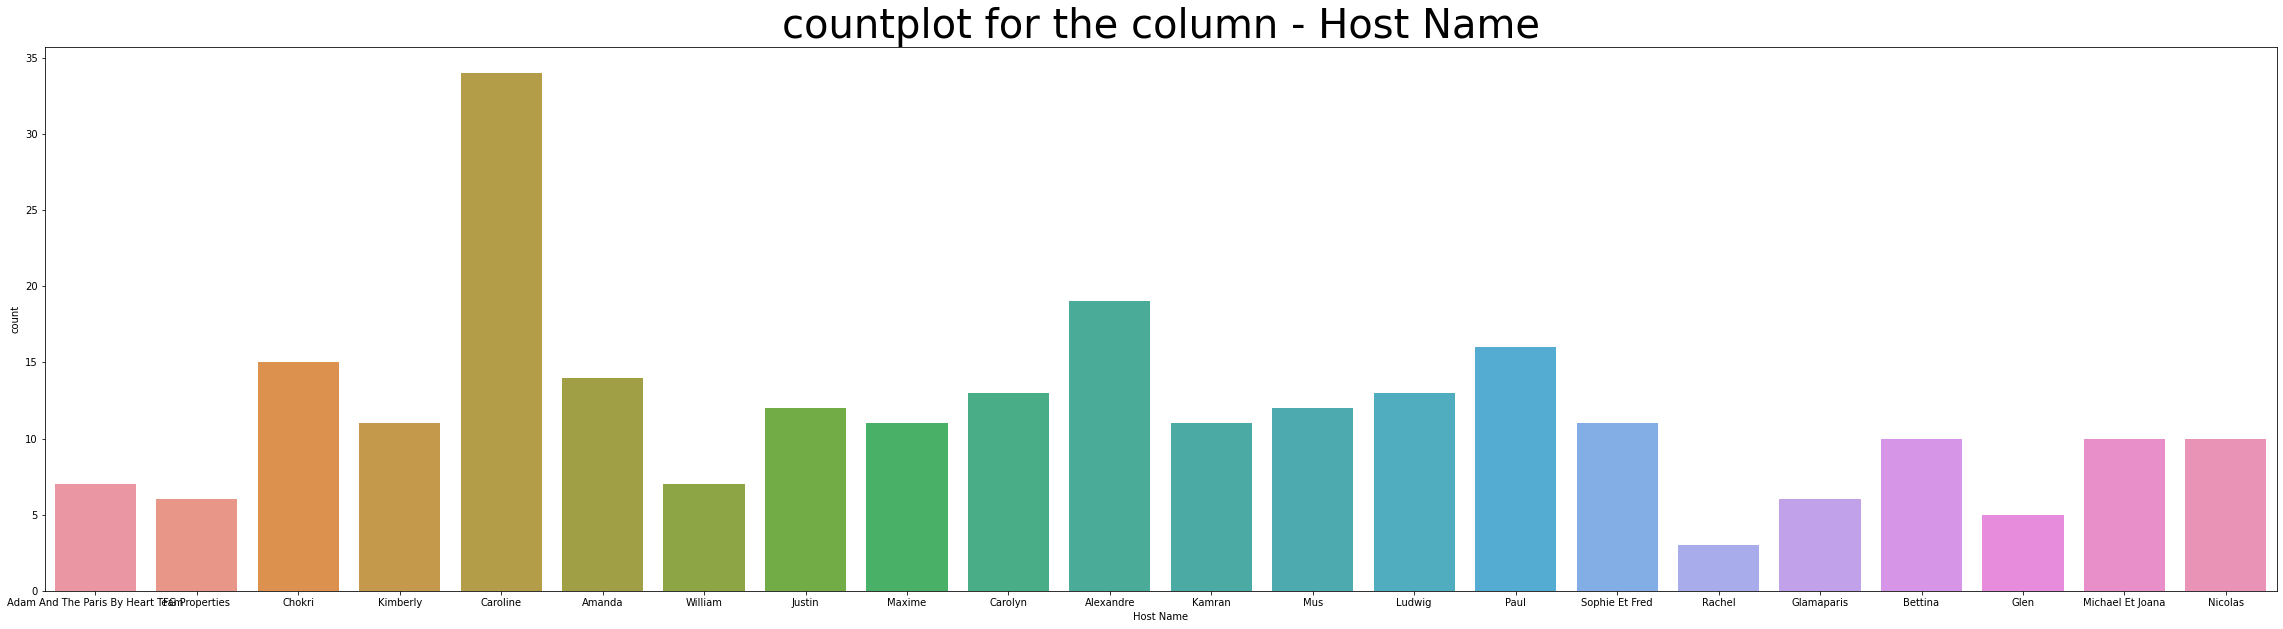

In [14]:
#A bar graph of the most rented property owners in the city
plt.figure(figsize=(40,10)) 
plt.title("countplot for the column - Host Name",size=(40))
sns.countplot(x="Host Name", data=for_host_name_chack_3)
plt.show()

#### we can see that there is a conection between Host name and number of orders. the top 3 head hosts has non-nationalistic names: Caroline, Alexander, Paul.
#### you can also see that rachel, whice is a nationalistic name, has the lowist amount of ordeaes.
#### lets look at Caroline: she has 34 apartments mostly in the 8 Neighbourhood, she has only enter hosue for rent and has normal price range (as we saw in the begining)

In [15]:
# Build a separate table for Caroline with all the data
Caroline=for_host_name_chack_3[for_host_name_chack_3['Host Name'].str.contains('Caroline')]

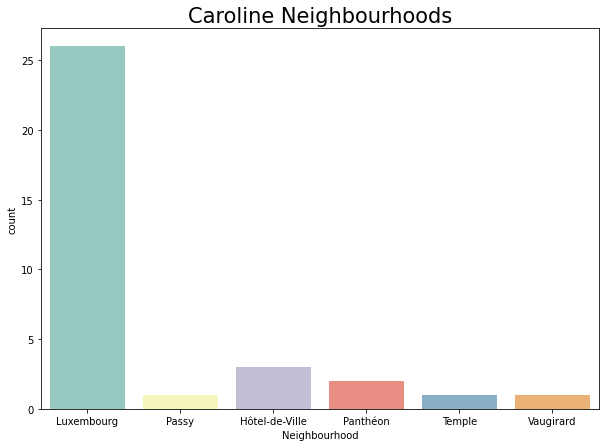

In [16]:
#A bar graph of Caroline's neighborhoods
plt.figure(1, figsize=(10,7))
plt.title("Caroline Neighbourhoods",size=(21))
sns.countplot(x='Neighbourhood', data=Caroline, palette="Set3")
plt.show()

#### It can be seen that most of Caroline's properties are in the Luxembourg neighborhood

### lets see the Distribution of orders in each Neighbourhood

In [17]:
#A loop that divides the neighborhoods by their real numbers in reality
num_Neighbourhood = []
for j in airbnb_data["New Neighbourhood"]:
    if j == 0:
        num_Neighbourhood.append(17)        
    if j == 1:
        num_Neighbourhood.append(2)
    if j == 2:
        num_Neighbourhood.append(19)
    if j == 3:
        num_Neighbourhood.append(18)
    if j == 4:
        num_Neighbourhood.append(10)
    if j == 5:
        num_Neighbourhood.append(13)
    if j == 6:
        num_Neighbourhood.append(4)
    if j == 7:
        num_Neighbourhood.append(1)
    if j == 8:
        num_Neighbourhood.append(6)
    if j == 9:
        num_Neighbourhood.append(20)
    if j == 10:
        num_Neighbourhood.append(14)
    if j == 11:
        num_Neighbourhood.append(9)
    if j == 12:
        num_Neighbourhood.append(7)
    if j == 13:
        num_Neighbourhood.append(5)
    if j == 14:
        num_Neighbourhood.append(16)
    if j == 15:
        num_Neighbourhood.append(11)
    if j == 16:
        num_Neighbourhood.append(12)
    if j == 17:
        num_Neighbourhood.append(3)
    if j == 18:
        num_Neighbourhood.append(15)
    if j == 19:
        num_Neighbourhood.append(8)
        
airbnb_data['num Neighbourhood'] = pd.Series(num_Neighbourhood)  

In [18]:
# Shows each neighborhood its numbering in the table
pd.pivot_table(airbnb_data,index=['Neighbourhood'],values=['num Neighbourhood'])

,num Neighbourhood
Neighbourhood,
Batignolles-Monceau,17
Bourse,2
Buttes-Chaumont,19
Buttes-Montmartre,18
Entrepôt,10
Gobelins,13
Hôtel-de-Ville,4
Louvre,1
Luxembourg,6


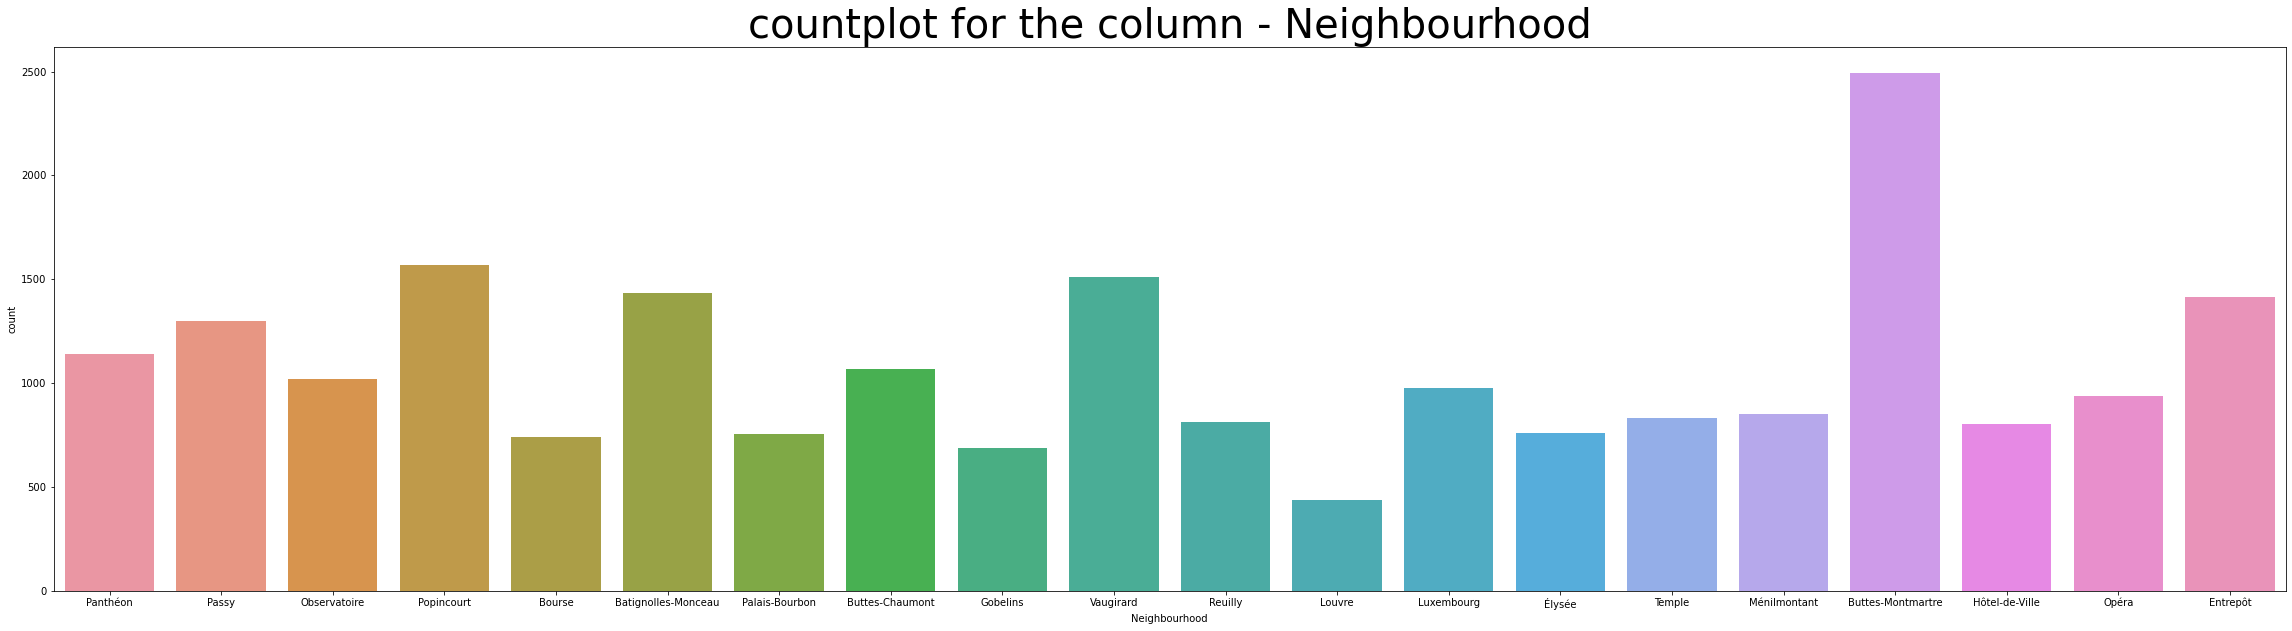

In [19]:
# Column graph of all neighborhoods in Data
plt.figure(figsize=(40,10)) 
plt.title("countplot for the column - Neighbourhood",size=(40))
sns.countplot(x="Neighbourhood", data=airbnb_data)
plt.show()


![](https://www.zigzagonearth.com/wp-content/uploads/2017/06/France-Paris-Attractions-Map-Paris-Neighborhoods-things-to-do.jpg)

#### It can be seen from the picture that most of the properties are actually not in the center like the 17, 18 neighborhood
#### In contrast, the slowest properties are located in the city center, such as the 1,4 neighborhood

### Therefore it can be concluded that the properties in the city center are very expensive so there are not so many properties for rent there

### In addition, from the graph of Caroline's neighborhoods, it can be seen that the neighborhood with the most properties is in the city center.
### It can therefore be concluded that Caroline must have a lot of money in order to have assets in the center.